<a href="https://colab.research.google.com/github/Shadi-Aldbaiss/Data-Preprocessing/blob/main/DataPreprocessing_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read dataset**

In [ ]:
# Import the dataset
try:
    df = pd.read_csv('/content/Data.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying with 'latin1'")
    df = pd.read_csv('/content/Data.csv', encoding='latin1')

# **Discovering dataset**

In [ ]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
df.shape

(10, 4)

In [ ]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [ ]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Country,10,3,France,4
Purchased,10,2,No,5


# **Handle Missing Values**

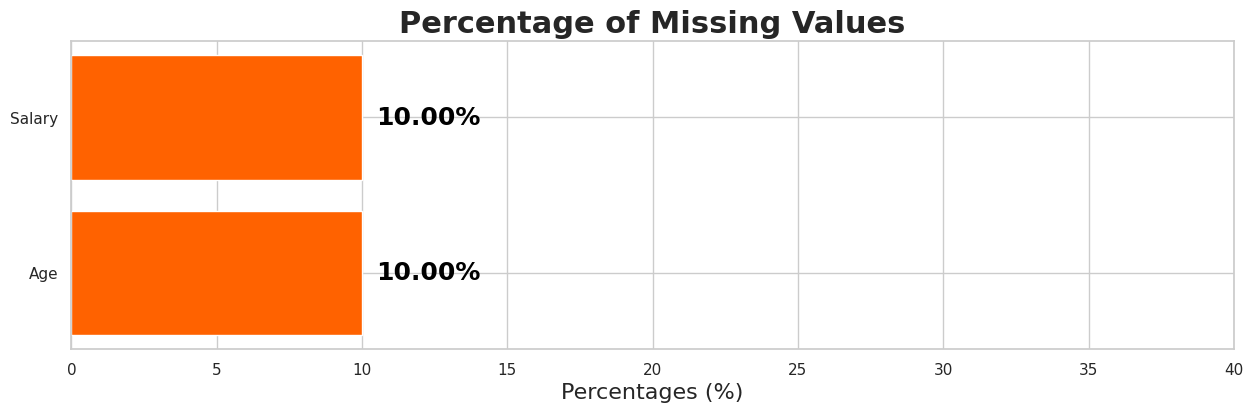

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
# drop rows with missing values
#df.dropna(inplace=True)
df_copy=df.copy()
df_copy = df_copy.dropna(subset=['Age', 'Salary'])

In [ ]:
# Verifying the removal of missing values
print(df_copy.isnull().sum().sum())

0


In [ ]:
# Getting the number of rows in the dataframe
df_copy.shape[0]

8

# **EDA**

## **UNIVARIATE ANALYSIS**

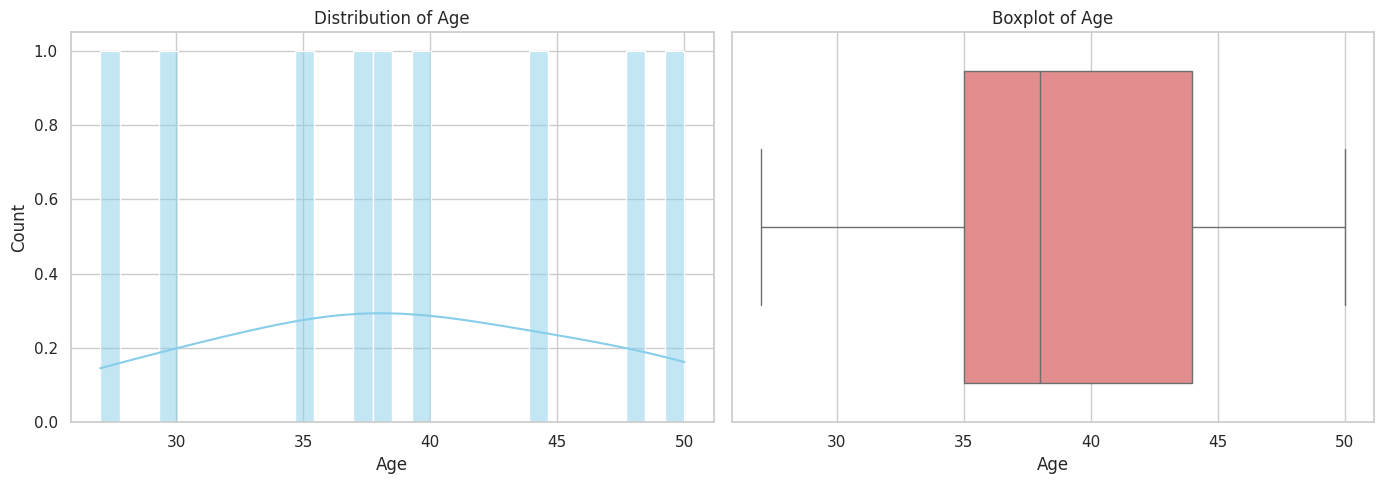

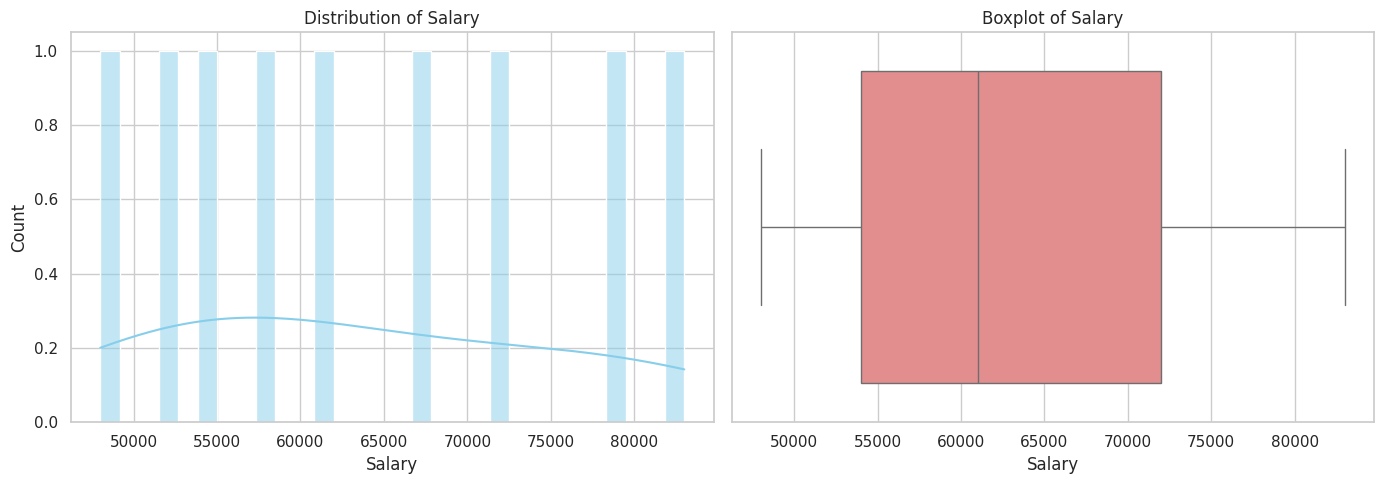

In [ ]:
# Set the style
sns.set(style="whitegrid")

df_copy=df.copy()
# Numerical columns
numerical_cols = ['Age', 'Salary']

# Loop through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_copy[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# **Handle Outliers**

In [ ]:
#Detect Outliers (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

numerical_cols = ['Age', 'Salary']
# Detect outliers in the numerical_cols

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Number of outliers in {col}: {len(outliers)}")




Number of outliers in Age: 0
Number of outliers in Salary: 0


# **Duplicate data**

In [ ]:
# Import the dataset
try:
    df_players = pd.read_csv('/content/Africa Cup of Nations Players.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying with 'latin1'")
    df_players = pd.read_csv('/content/Africa Cup of Nations Players.csv', encoding='latin1')

In [ ]:
df_players.head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
0,1957,NaN,GK,Ali Bakr,NaN,NaN,NaN,Zamalek,Egypt
1,1957,NaN,GK,"Paraskos ""Brascos"" Trimeritis",NaN,NaN,NaN,El-Qanah,Egypt
2,1957,NaN,GK,Abdel-Galil Hameida,NaN,NaN,NaN,Al-Ahly,Egypt
3,1957,NaN,DF,Mosaad Daoud,NaN,NaN,NaN,El-Olympi,Egypt
4,1957,NaN,DF,El-Sayed El-Arabi,NaN,NaN,NaN,Teram,Egypt


In [ ]:
df_players.duplicated()[712:721]

,0
712,False
713,False
714,True
715,False
716,False
717,False
718,True
719,False
720,False


In [ ]:
df_players.duplicated().sum()

np.int64(20)

In [ ]:
df_players[df_players.duplicated()]

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
718,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
734,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo
755,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Congo
804,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zaire
819,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
826,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
841,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda
845,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda
856,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zambia


In [ ]:
result = df_players.duplicated(subset=['Year','PlayerName'])
df_players[result].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
160,1962,NaN,NaN,Francis Atema,NaN,NaN,NaN,NaN,Uganda
676,1972,NaN,NaN,NaN,(1954-01-30)30 January 1954 (aged 18),NaN,NaN,NaN,Cameroon
682,1972,NaN,NaN,NaN,(1946-06-12)12 June 1946 (aged 25),NaN,NaN,NaN,Cameroon
706,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali


In [ ]:
result = df_players.duplicated(subset=['Year','PlayerName'])
df_players[~result].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
0,1957,NaN,GK,Ali Bakr,NaN,NaN,NaN,Zamalek,Egypt
1,1957,NaN,GK,"Paraskos ""Brascos"" Trimeritis",NaN,NaN,NaN,El-Qanah,Egypt
2,1957,NaN,GK,Abdel-Galil Hameida,NaN,NaN,NaN,Al-Ahly,Egypt
3,1957,NaN,DF,Mosaad Daoud,NaN,NaN,NaN,El-Olympi,Egypt
4,1957,NaN,DF,El-Sayed El-Arabi,NaN,NaN,NaN,Teram,Egypt


In [ ]:
df_players[df_players.duplicated(keep=False)].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
706,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
718,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
729,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo
734,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo


In [ ]:
df_players.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
0,1957,NaN,GK,Ali Bakr,NaN,NaN,NaN,Zamalek,Egypt
1,1957,NaN,GK,"Paraskos ""Brascos"" Trimeritis",NaN,NaN,NaN,El-Qanah,Egypt
2,1957,NaN,GK,Abdel-Galil Hameida,NaN,NaN,NaN,Al-Ahly,Egypt
3,1957,NaN,DF,Mosaad Daoud,NaN,NaN,NaN,El-Olympi,Egypt
4,1957,NaN,DF,El-Sayed El-Arabi,NaN,NaN,NaN,Teram,Egypt
...,...,...,...,...,...,...,...,...,...
7529,2019,19,FW,Joseph Mendes,(1991-03-30)30 March 1991 (aged 28),0,0,Ajaccio,Guinea-Bissau
7530,2019,20,MF,Sori Mané,(1996-04-03)3 April 1996 (aged 23),7,0,Cova da Piedade,Guinea-Bissau
7531,2019,21,DF,Nanú,(1994-05-17)17 May 1994 (aged 25),0,0,Marítimo,Guinea-Bissau
7532,2019,22,DF,Mamadu Candé,(1990-08-29)29 August 1990 (aged 28),14,0,Santa Clara,Guinea-Bissau


In [ ]:
display('Before drop duplicates: ',df_players.shape)
display('After drop duplicates: ',df_players.drop_duplicates().shape)

'Before drop duplicates: '

(7534, 9)

'After drop duplicates: '

(7514, 9)